In [13]:
import boto3
import pandas as pd
from collections import OrderedDict
import pytz
from zipline.api import order, record, symbol, set_benchmark
import zipline
from datetime import datetime

client = boto3.client('s3')
obj = client.get_object(Bucket='vishal-data', Key='data.csv')
data = OrderedDict()
data['SPY'] = pd.read_csv(obj['Body'], index_col=0, parse_dates=['date'])
# print(data['SPY'].head())
data['SPY'] = data['SPY'][["open", "high", "low", "close", "volume"]]
data['SPY'].head()

,open,high,low,close,volume
date,,,,,
1993-01-29,43.9687,43.9687,43.7500,43.9375,1003200
1993-02-01,43.9687,44.2500,43.9687,44.2500,480500
1993-02-02,44.2187,44.3750,44.1250,44.3437,201300
1993-02-03,44.4062,44.8437,44.3750,44.8125,529400
1993-02-04,44.9687,45.0937,44.4687,45.0000,531500


In [14]:
panel = pd.Panel(data)
panel.minor_axis = ["open", "high", "low", "close", "volume"]
panel.major_axis = panel.major_axis.tz_localize(pytz.utc)
panel

<class 'pandas.core.panel.Panel'>
Dimensions: 1 (items) x 6329 (major_axis) x 5 (minor_axis)
Items axis: SPY to SPY
Major_axis axis: 1993-01-29 00:00:00+00:00 to 2018-03-16 00:00:00+00:00
Minor_axis axis: open to volume

In [15]:
def initialize(context):
    set_benchmark(symbol("SPY"))


def handle_data(context, data):
    order(symbol("SPY"), 10)
    record(SPY=data.current(symbol('SPY'), 'price'))


perf = zipline.run_algorithm(start=datetime(2017, 1, 5, 0, 0, 0, 0, pytz.utc),
                            initialize=initialize,
                            capital_base=100000,
                            handle_data=handle_data,
                            end=datetime(2018, 3, 1, 0, 0, 0, 0, pytz.utc),
                            data=panel)
perf.head()

,SPY,algo_volatility,algorithm_period_return,alpha,benchmark_period_return,benchmark_volatility,beta,capital_used,ending_cash,ending_exposure,...,short_exposure,short_value,shorts_count,sortino,starting_cash,starting_exposure,starting_value,trading_days,transactions,treasury_period_return
2017-01-05 21:00:00+00:00,226.399994,NaN,0.000000,NaN,-0.000794,NaN,NaN,0.00000,100000.00000,0.00000,...,0.0,0.0,0,NaN,100000.00000,0.00000,0.00000,1,[],0.0
2017-01-06 21:00:00+00:00,227.210007,0.000129,-0.000011,-0.000525,0.002780,0.049077,-0.002621,-2273.24612,97726.75388,2272.10007,...,0.0,0.0,0,-11.224972,100000.00000,0.00000,0.00000,2,"[{'commission': None, 'price': 227.3236120035,...",0.0
2017-01-09 21:00:00+00:00,226.460007,0.000745,-0.000098,-0.007814,-0.000530,0.055263,0.009381,-2265.74237,95461.01151,4529.20014,...,0.0,0.0,0,-10.290439,97726.75388,2272.10007,2272.10007,3,"[{'commission': None, 'price': 226.5732370035,...",0.0
2017-01-10 21:00:00+00:00,226.460007,0.000631,-0.000109,-0.006577,-0.000530,0.045143,0.009486,-2265.74237,93195.26914,6793.80021,...,0.0,0.0,0,-9.867518,95461.01151,4529.20014,4529.20014,4,"[{'commission': None, 'price': 226.5732370035,...",0.0
2017-01-11 21:00:00+00:00,227.100006,0.001574,0.000071,0.000904,0.002295,0.044369,0.023095,-2272.14556,90923.12358,9084.00024,...,0.0,0.0,0,5.753326,93195.26914,6793.80021,6793.80021,5,"[{'commission': None, 'price': 227.213556003, ...",0.0


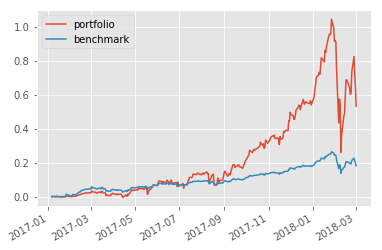

In [16]:
import matplotlib.pyplot as plt
from matplotlib import style


style.use("ggplot")

perf.portfolio_value.pct_change().fillna(0).add(1).cumprod().sub(1).plot(label='portfolio')
perf.SPY.pct_change().fillna(0).add(1).cumprod().sub(1).plot(label='benchmark')
plt.legend(loc=2)

plt.show()

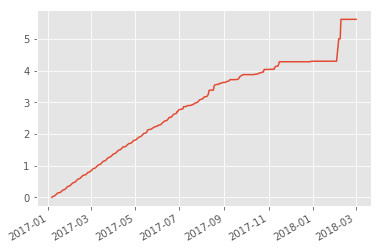

In [17]:
perf.max_leverage.plot()
plt.show()